In [1]:
import pandas as pd
import requests
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import h5py

In [2]:
#start = datetime(2022, 9, 11, 0, 0)
start = datetime(2023, 2, 1, 0, 0)
end = datetime(2023, 2, 28, 23, 59)

zones = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

In [3]:
df_grid = pd.read_excel('../flow_based_domain/grid.xlsx', index_col=0)
df_timestamps = pd.read_excel('../flow_based_domain/timestamps.xlsx', index_col=0)
df_line_edge_map = pd.read_excel('../flow_based_domain/line_edge_map.xlsx', index_col=0)
tielines = list(df_grid[df_grid.tieline == True].index)

In [4]:
df_ptdf_obs = pd.read_excel('./ptdf_z_obs.xlsx', index_col=0)
#df_ptdf_nuts_feb = pd.read_excel('./ptdf_z_calc_nuts_feb_7.xlsx', index_col=0)
#df_ptdf_nuts = pd.read_excel('./ptdf_z_calc_nuts.xlsx', index_col=0)
#display(df_ptdf_obs)
#display(df_ptdf)

In [69]:
df_ptdf = pd.read_excel('./ptdf_z_calc.xlsx', index_col=0)

In [67]:
lines_in_zone = list(df_grid[df_grid.zone == 'BE'].index)
df_ptdf_obs[df_ptdf_obs.line_id.isin(lines_in_zone)][['line_id', 'contingency', 'DateTime']].groupby(['line_id', 'contingency']).count().sort_values(by=['DateTime'])



DateTime
line_id contingency          
1099     264                4
2804     218                7
         226               10
1221    -1                 27
2800    -1                 49
2804     265               52
2803     302               82
2801    -1                165
1099    -1                190
2805     270              387
2804    -1                519
2803    -1               1054
1099     48              1325
2805    -1               1350

In [5]:
df_ptdf_nuts_feb_5 = pd.read_excel('./ptdf_z_calc_nuts_feb_5.xlsx', index_col=0)
df_ptdf_nuts_feb_5 = df_ptdf_nuts_feb_5.reset_index()

In [26]:
df_ptdf_nuts_feb_4 = pd.read_excel('./ptdf_z_calc_nuts_feb_4.xlsx', index_col=0)
df_ptdf_nuts_feb_4 = df_ptdf_nuts_feb_4.reset_index()

In [33]:
df_ptdf_nuts_feb_tso = pd.read_excel('./ptdf_z_calc_nuts_feb_tso.xlsx', index_col=0)
df_ptdf_nuts_feb_tso = df_ptdf_nuts_feb_tso.reset_index()

In [5]:
df_ptdf_nuts_feb = df_ptdf_nuts_feb.reset_index()

In [142]:
display(df_ptdf_nuts_feb_4.groupby('DateTime').count()['line_id'].mean())

484.3958333333333

In [49]:
display(df_ptdf_obs[(df_ptdf_obs.line_id.isin(tielines))].groupby('DateTime').count()['line_id'].mean())

33.83579444772593

In [7]:
df_ptdf_nuts_feb.ram.min()

0

In [82]:
# BORDERS CONSIDERED BY TSOs
total_borders_considered_jao = []
for _, lines in df_ptdf_obs[(df_ptdf_obs.line_id.isin(tielines))].groupby('DateTime'):
    borders = []
    for l in list(lines['line_id']):
        eic = df_grid.loc[l, 'eic']
        if eic[:4] == '10T-':
            z1 = eic[4:6]
            z2 = eic[7:9]
            if [z1, z2] not in borders:# and [z2, z1] not in borders:
                borders.append([z1, z2])
            if [z1, z2] not in total_borders_considered_jao:
                total_borders_considered_jao.append([z1, z2])
    #print([b[0] + '-' + b[1] for b in borders])
    
print(len(total_borders_considered_jao))
print([b[0] + '-' + b[1] for b in total_borders_considered_jao])

17
['DE-FR', 'DE-NL', 'AT-CZ', 'AT-HU', 'AT-SI', 'CZ-SK', 'CZ-DE', 'BE-NL', 'BE-FR', 'HR-SI', 'CZ-PL', 'HU-SK', 'AT-DE', 'HR-HU', 'HU-RO', 'DE-PL', 'PL-SK']


In [65]:
# BORDERS CONSIDERED BY MY MODEL (alpha = 0.1)

total_borders_considered_model = []
for _, lines in df_ptdf_nuts[(df_ptdf_nuts.line_id.isin(tielines))].groupby('DateTime'):
    borders = []
    for l in list(lines['line_id']):
        eic = df_grid.loc[l, 'eic']
        if eic[:4] == '10T-':
            z1 = eic[4:6]
            z2 = eic[7:9]
            if [z1, z2] not in borders:# and [z2, z1] not in borders:
                borders.append([z1, z2])
            if [z1, z2] not in total_borders_considered_model:
                total_borders_considered_model.append([z1, z2])
    #print([b[0] + '-' + b[1] for b in borders])
    
print(len(total_borders_considered_model))
print([b[0] + '-' + b[1] for b in total_borders_considered_model])

8
['DE-FR', 'AT-DE', 'AT-HU', 'AT-SI', 'CZ-PL', 'BE-FR', 'HR-HU', 'HU-RO']


In [6]:
# BORDERS CONSIDERED BY MY MODEL (alpha = 0.07)

total_borders_considered_model_07 = []
for _, lines in df_ptdf_nuts_feb[(df_ptdf_nuts_feb.line_id.isin(tielines))].groupby('DateTime'):
    borders = []
    for l in list(lines['line_id']):
        eic = df_grid.loc[l, 'eic']
        if eic[:4] == '10T-':
            z1 = eic[4:6]
            z2 = eic[7:9]
            if [z1, z2] not in borders:# and [z2, z1] not in borders:
                borders.append([z1, z2])
            if [z1, z2] not in total_borders_considered_model_07:
                total_borders_considered_model_07.append([z1, z2])
    #print([b[0] + '-' + b[1] for b in borders])
    
print(len(total_borders_considered_model_07))
print([b[0] + '-' + b[1] for b in total_borders_considered_model_07])

10
['CZ-DE', 'DE-FR', 'AT-DE', 'AT-HU', 'AT-SI', 'CZ-PL', 'BE-FR', 'HR-SI', 'HR-HU', 'HU-RO']


In [80]:
# BORDERS CONSIDERED BY MY MODEL (alpha = 0.05)

total_borders_considered_model_5 = []
for _, lines in df_ptdf_nuts_feb_5[(df_ptdf_nuts_feb_5.line_id.isin(tielines))].groupby('DateTime'):
    borders = []
    for l in list(lines['line_id']):
        eic = df_grid.loc[l, 'eic']
        if eic[:4] == '10T-':
            z1 = eic[4:6]
            z2 = eic[7:9]
            if [z1, z2] not in borders:# and [z2, z1] not in borders:
                borders.append([z1, z2])
            if [z1, z2] not in total_borders_considered_model_5:
                total_borders_considered_model_5.append([z1, z2])
    #print([b[0] + '-' + b[1] for b in borders])
    
print(len(total_borders_considered_model_5))
print([b[0] + '-' + b[1] for b in total_borders_considered_model_5])

15
['CZ-DE', 'DE-PL', 'DE-FR', 'AT-DE', 'AT-CZ', 'AT-HU', 'AT-SI', 'CZ-PL', 'BE-FR', 'HR-SI', 'BE-NL', 'HR-HU', 'HU-RO', 'PL-SK', 'CZ-SK']


In [81]:
# BORDERS CONSIDERED BY MY MODEL (alpha = 0.04)

total_borders_considered_model_4 = []
for _, lines in df_ptdf_nuts_feb_4[(df_ptdf_nuts_feb_4.line_id.isin(tielines))].groupby('DateTime'):
    borders = []
    for l in list(lines['line_id']):
        eic = df_grid.loc[l, 'eic']
        if eic[:4] == '10T-':
            z1 = eic[4:6]
            z2 = eic[7:9]
            if [z1, z2] not in borders:# and [z2, z1] not in borders:
                borders.append([z1, z2])
            if [z1, z2] not in total_borders_considered_model_4:
                total_borders_considered_model_4.append([z1, z2])
    #print([b[0] + '-' + b[1] for b in borders])
    
print(len(total_borders_considered_model_4))
print([b[0] + '-' + b[1] for b in total_borders_considered_model_4])

16
['CZ-DE', 'DE-PL', 'DE-FR', 'AT-DE', 'AT-CZ', 'AT-HU', 'AT-SI', 'CZ-SK', 'CZ-PL', 'BE-FR', 'HR-SI', 'BE-NL', 'HR-HU', 'HU-SK', 'HU-RO', 'PL-SK']


In [44]:
display(df_ptdf_nuts_feb[
    #(df_ptdf_nuts_feb.line_id.isin(tielines)) & 
    (df_ptdf_nuts_feb.ram > 0)][['DateTime', 'line_id']
].groupby('DateTime').count()['line_id'])

display(df_ptdf_nuts_feb[
    (df_ptdf_nuts_feb.line_id.isin(tielines)) & 
    (df_ptdf_nuts_feb.ram < 0)][['DateTime', 'line_id']
].groupby('line_id').first())


DateTime
2023-02-01 01:00:00    160
2023-02-01 02:00:00    160
2023-02-01 03:00:00    160
2023-02-01 04:00:00    160
2023-02-01 05:00:00    160
                      ... 
2023-02-26 23:00:00    162
2023-02-28 10:00:00    163
2023-02-28 11:00:00    163
2023-02-28 12:00:00    163
2023-02-28 13:00:00    163
Name: line_id, Length: 158, dtype: int64

,DateTime
line_id,
2664,2023-02-02 09:00:00
2665,2023-02-02 09:00:00
2668,2023-02-02 09:00:00
2669,2023-02-02 09:00:00
2670,2023-02-02 09:00:00
...,...
2846,2023-02-02 09:00:00
2847,2023-02-02 09:00:00
2848,2023-02-02 09:00:00


In [11]:
hf = h5py.File("../base_case/ref_flow_nuts.jld", "r")
ref_flow = np.transpose(hf.get("data"))

In [6]:
# CALCULATING LINE CAPACITIES

for index, row in df_grid.iterrows():
    current = row['max_current']
    if np.isnan(current):
        current = 3000
    
    if row['length'] > 100:
        df_grid.loc[index, 'capacity'] = row['voltage']**2/(2*row['reactance'])
    else:
        df_grid.loc[index, 'capacity'] = np.sqrt(3) * row['voltage'] * current / 1000

In [7]:
# DETERMINING FRM per zone

df_lines_frm = df_ptdf_obs[['frm', 'line_id']].groupby('line_id').mean()

for index, row in df_lines_frm.iterrows():
    df_lines_frm.loc[index, 'zone'] = df_grid.loc[index, 'zone']
    
df_lines_frm = df_lines_frm.groupby('zone').max()

In [34]:
# ADDING F_REF, FRM AND RAM to PTDF

timestamps = list(df_timestamps[
    (df_timestamps.index >= datetime(2022, 9, 11, 0, 0)) &
    (df_timestamps.index <= datetime(2023, 2, 28, 23, 59))
].index)

ts = 1
for index, row in df_ptdf_nuts_feb_tso[df_ptdf_nuts_feb_tso.DateTime <= datetime(2023, 2, 28, 23, 59)].iterrows():
    t = timestamps.index(row['DateTime'])
    l = df_line_edge_map.loc[df_line_edge_map.line_id == row['line_id'], 'edge'].iloc[0]
    zone = df_grid.loc[row['line_id'], 'zone']
    cap = df_grid.loc[row['line_id'], 'capacity']
    
    fref = ref_flow[t][l]
    frm = df_lines_frm.loc[zone, 'frm']
    ram = cap - frm - fref
    
    df_ptdf_nuts_feb_tso.loc[index, 'fref'] = fref
    df_ptdf_nuts_feb_tso.loc[index, 'frm'] = frm
    df_ptdf_nuts_feb_tso.loc[index, 'ram'] = ram
    
    ts += 1
    if ts % 1000 == 0:
        print(ts)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000


In [36]:
df_ptdf_nuts_feb_tso.to_excel('./ptdf_z_calc_nuts_feb_tso.xlsx')

In [35]:
df_ptdf_nuts_feb_tso.loc[df_ptdf_nuts_feb_tso.ram < 0, 'ram'] = 0

In [39]:
display(df_ptdf_nuts_feb_tso.ram.mean())

1166.8513601295813

In [5]:
df_ptdf_naive = df_ptdf_obs.copy()
df_ptdf_naive.DateTime = pd.to_datetime(df_ptdf_naive.DateTime)
df_ptdf_naive.DateTime = df_ptdf_naive.DateTime + pd.Timedelta('1 day')

In [6]:
df_ptdf_naive.to_excel('./ptdf_z_naive.xlsx')

In [8]:
# OVERLAP

overlap_data = {
    'DateTime': df_ptdf.index.unique(),
    'overlap': np.zeros(len(df_ptdf.index.unique()))
}
df_overlap = pd.DataFrame(data=overlap_data)
df_overlap = df_overlap.set_index('DateTime')

prev_timestamp = 0
for timestamp in df_ptdf.index.unique():
    obs_lines = list(df_ptdf_obs[df_ptdf_obs.DateTime == timestamp]['line_id'])
    obs_tielines = list(df_ptdf_obs[(df_ptdf_obs.DateTime == timestamp) & df_ptdf_obs.line_id.isin(tielines)]['line_id'])
    obs_c0 = list(df_ptdf_obs[(df_ptdf_obs.DateTime == timestamp) & (df_ptdf_obs.contingency == -1)]['line_id'])
    
    total_count = len(df_ptdf_obs[(df_ptdf_obs.DateTime == timestamp)])
    tieline_total_count = len(df_ptdf_obs[(df_ptdf_obs.DateTime == timestamp) & df_ptdf_obs.line_id.isin(tielines)])
    c0_total_count = len(df_ptdf_obs[(df_ptdf_obs.DateTime == timestamp) & (df_ptdf_obs.contingency == -1)])
    
    overlap_count = len(df_ptdf[(df_ptdf.index == timestamp) & df_ptdf.line_id.isin(obs_lines)])
    nuts_overlap_count = len(df_ptdf_nuts[(df_ptdf_nuts.index == timestamp) & df_ptdf_nuts.line_id.isin(obs_lines)])
    naive_overlap_count = len(df_ptdf_naive[(df_ptdf_naive.DateTime == timestamp) & df_ptdf_naive.line_id.isin(obs_lines)])
    tieline_overlap_count = len(df_ptdf[(df_ptdf.index == timestamp) & df_ptdf.line_id.isin(obs_tielines)])
    c0_overlap_count = len(df_ptdf[(df_ptdf.index == timestamp) & df_ptdf.line_id.isin(obs_c0)])
    
    if total_count > 0:
        df_overlap.loc[timestamp, 'naive_overlap'] = naive_overlap_count / total_count
        df_overlap.loc[timestamp, 'overlap'] = overlap_count / total_count
        df_overlap.loc[timestamp, 'nuts_overlap'] = nuts_overlap_count / total_count
    else:
        df_overlap.loc[timestamp, 'naive_overlap'] = df_overlap.loc[prev_timestamp, 'naive_overlap']
        df_overlap.loc[timestamp, 'overlap'] = df_overlap.loc[prev_timestamp, 'overlap']
        df_overlap.loc[timestamp, 'nuts_overlap'] = df_overlap.loc[prev_timestamp, 'nuts_overlap']
        
    if tieline_total_count > 0:
        df_overlap.loc[timestamp, 'tieline_overlap'] = tieline_overlap_count / tieline_total_count
    else:
        df_overlap.loc[timestamp, 'tieline_overlap'] = df_overlap.loc[prev_timestamp, 'tieline_overlap']
        
    if c0_total_count > 0:
        df_overlap.loc[timestamp, 'c0_overlap'] = c0_overlap_count / c0_total_count
    else:
        df_overlap.loc[timestamp, 'c0_overlap'] = df_overlap.loc[prev_timestamp, 'c0_overlap']
        
    prev_timestamp = timestamp

Text(0, 0.5, 'Fraction [-]')

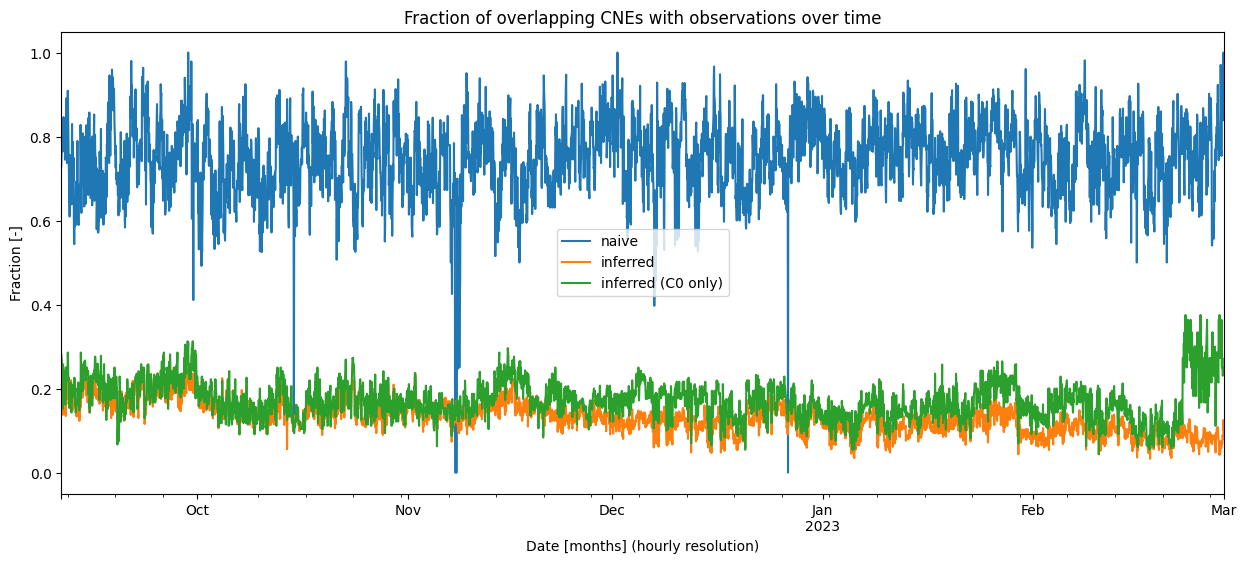

In [17]:
fig, ax = plt.subplots()
df_overlap[['naive_overlap', 'overlap', 'c0_overlap']].plot(figsize=(15,6), ax=ax)
ax.legend(['naive', 'inferred', 'inferred (C0 only)'])
plt.title('Fraction of overlapping CNEs with observations over time')
ax.set_xlabel('Date [months] (hourly resolution)')
ax.set_ylabel('Fraction [-]')

In [71]:
# ERROR METRICS - WITHIN THE OVERLAPPING SET

ptdf_mre = np.zeros((len(zones), len(df_ptdf.index.unique())))

for zone in zones:
    print(zone)
    zone_lines = list(df_grid[df_grid.zone == zone].index)
    z = zones.index(zone)
    for t, timestamp in enumerate(df_ptdf.index.unique()):
        obs_c0 = df_ptdf_obs[
            (df_ptdf_obs.line_id.isin(zone_lines)) & 
            (df_ptdf_obs.DateTime == timestamp) & 
            (df_ptdf_obs.contingency == -1)]
        c0_overlap = df_ptdf[(df_ptdf.index == timestamp) & df_ptdf.line_id.isin(list(obs_c0['line_id']))]
        
        obs_c0_overlap = obs_c0[obs_c0.line_id.isin(list(c0_overlap['line_id']))]
        if abs(obs_c0_overlap[zones].to_numpy()).all() > 0:
            diff = abs(c0_overlap[zones].to_numpy() - obs_c0_overlap[zones].to_numpy())
            if len(diff) > 0:
                ptdf_mre[z][t] = np.min(diff)
            else:
                ptdf_mre[z][t] = np.nan
        else:
            ptdf_mre[z][t] = np.nan

AT
BE
CZ
DE_LU
FR
HR
HU
NL
PL
RO
SI
SK


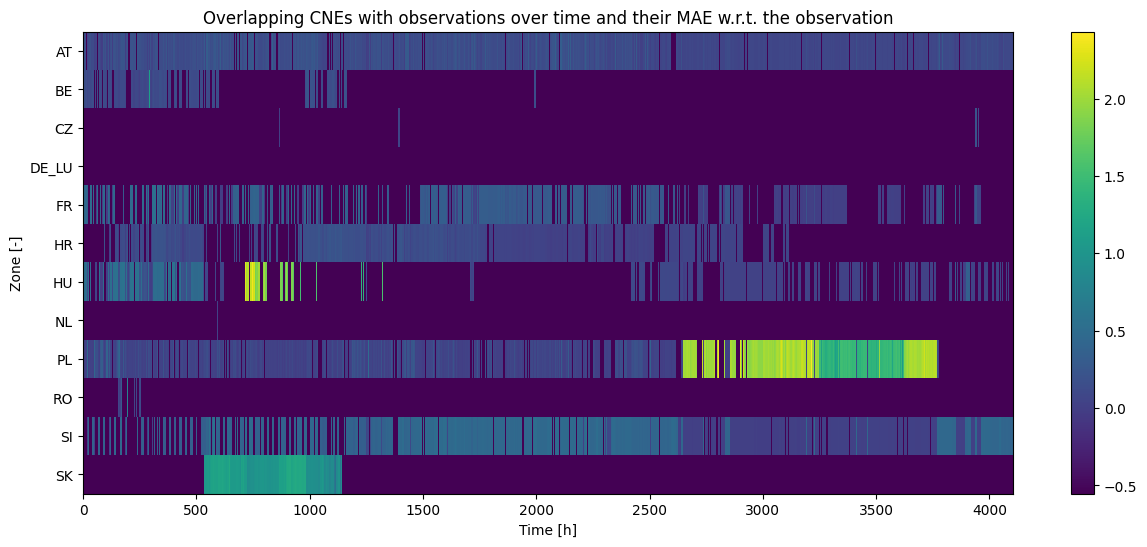

In [137]:
#ptdf_mre[np.isnan(ptdf_mre)] = -1
ptdf_mre[ptdf_mre == -0.02] = -0.03

fig, ax = plt.subplots(figsize=(15,6))
plt.imshow(ptdf_mre, interpolation='none', aspect='auto')
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_yticklabels(zones)
ax.set_xlabel('Time [h]')
ax.set_ylabel('Zone [-]')
plt.title("Overlapping CNEs with observations over time and their MAE w.r.t. the observation")
plt.colorbar()
plt.show()

In [99]:
# OVERALL ERROR METRICS
print('delta_abs (MAE):', round(np.mean(ptdf_mre[ptdf_mre != -0.03]), 4))
print('delta_std:', round(100*np.mean(ptdf_mre[ptdf_mre != -0.03])/df_ptdf_obs[zones].stack().std(), 2), '%')
print('delta_mu (MRE):', round(100*np.mean(ptdf_mre[ptdf_mre != -0.03]) / df_ptdf_obs[zones].abs().mean().mean(), 2), '%')

delta_abs (MAE): 0.0161
delta_std: 19.62 %
delta_mu (MRE): 29.68 %


Text(0.5, 0.98, 'Inferred GSK strategies for each zone')

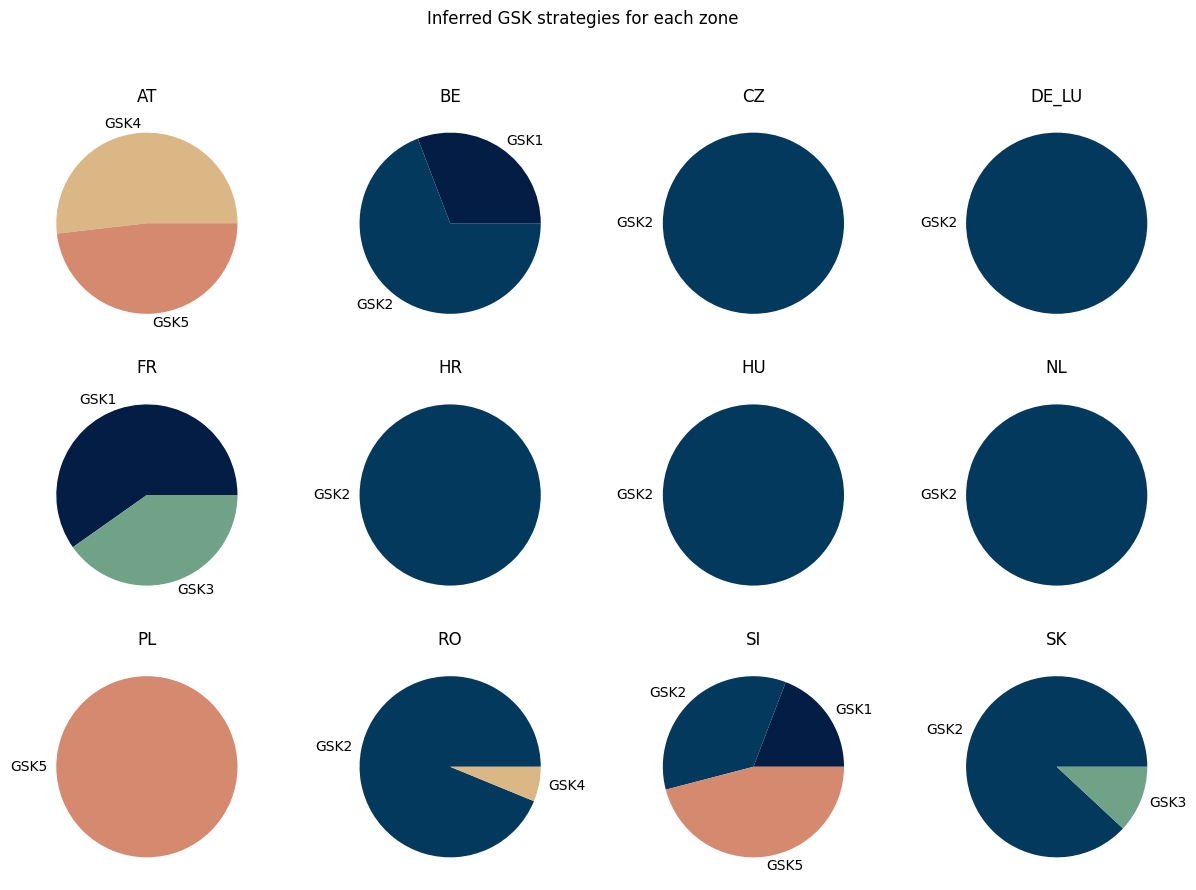

In [101]:
# GSK COMPOSITION

labels = ['GSK1', 'GSK2', 'GSK3', 'GSK4', 'GSK5']
colors = ['#031D44','#04395E','#70A288','#DAB785', '#D5896F']
sigma_data = h5py.File("./sigma_nuts.jld", "r")
sigma = np.transpose(sigma_data.get("data"))

fig, axs = plt.subplots(3, 4, sharey=True, sharex=True, figsize=(15, 10))
zone_axs = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3],
    axs[2, 0], axs[2, 1], axs[2, 2], axs[2, 3],
]

for index, zone in enumerate(zones):
    active_idx = [idx for idx, gsk in enumerate(sigma[:, index]) if gsk > 0]
    zone_axs[index].pie(sigma[active_idx, index], 
                        labels=[labels[i] for i in active_idx], 
                        colors=[colors[i] for i in active_idx])
    zone_axs[index].set_title(zone)
    
#for ax in axs.flat:
    #ax.set(xlabel='MRE [-]', ylabel='Occurence [-]')

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Inferred GSK strategies for each zone')

C:\Users\balaz\SoftwareDeveloping\TUD\thesis\FBMC\fbmc_env\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\balaz\SoftwareDeveloping\TUD\thesis\FBMC\fbmc_env\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'MAE [-]')

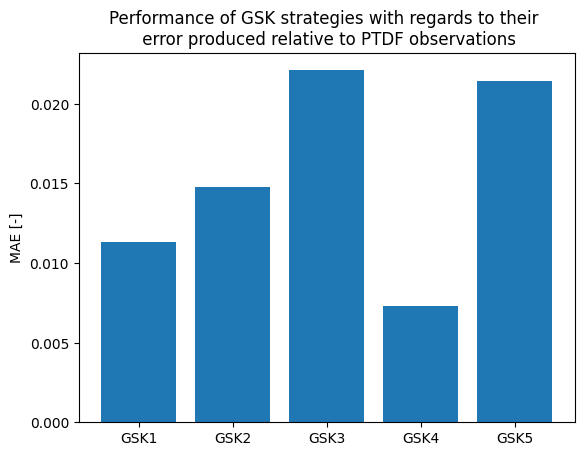

In [135]:
# GSK PERFORMANCE

gsk_errors = [[], [], [], [], []]
gsk_weights = [[], [], [], [], []]

for z, zone in enumerate(zones):
    zone_abs_error = np.mean(list(filter(lambda x: x != -0.03, ptdf_mre[z, :])))
    if not np.isnan(zone_abs_error):
        active_idx = [idx for idx, gsk in enumerate(sigma[:, z]) if gsk > 0]
        weights = sigma[active_idx, z]
        for i in active_idx:
            gsk_errors[i].append(zone_abs_error)
            gsk_weights[i].append(sigma[i, z])
            
mae_gsk = []
mre_gsk = []

for g in range(5):
    mae = round(np.average(gsk_errors[g], weights=gsk_weights[g]), 4)
    #print('MAE_GSK{0}:'.format(g+1), mae)
    mae_gsk.append(mae)
    
for g in range(5):
    mre=round(100*np.average(gsk_errors[g], weights=gsk_weights[g])/df_ptdf_obs[zones].abs().mean().mean(), 2)
    #print('MRE_GSK{0}:'.format(g+1), mre)
    mre_gsk.append(mre)

fig, ax = plt.subplots()
ax.bar(['GSK1', 'GSK2', 'GSK3', 'GSK4', 'GSK5'], mae_gsk)
plt.title('Performance of GSK strategies with regards to their \n error produced relative to PTDF observations')
ax.set_ylabel('MAE [-]')

In [110]:
list(filter(lambda x: x != -0.03, ptdf_mre[0, :]))

[0.00542671575813989,
 0.005404584815221459,
 0.00500001089477178,
 0.01263528659366992,
 0.010717700016544778,
 0.010555085626564889,
 0.00848216104045067,
 0.008925534772092021,
 0.00896553489300917,
 0.00894553491083813,
 0.008305534860648221,
 0.008235534821103181,
 0.009542413592075132,
 0.00941990724395852,
 0.0093144437054365,
 0.004289628349294331,
 0.00285653101714448,
 0.0027835153126952493,
 0.007142407739312059,
 0.01045950621222615,
 0.00958735353829384,
 0.00874233453958112,
 0.00594837389705549,
 0.00668541972049488,
 0.007007551539042461,
 0.01147018313759636,
 0.008449476998306307,
 0.011683495996282621,
 0.01029459917181157,
 0.01007459917181159,
 0.01018959917181161,
 0.01022959917181179,
 0.01026384622472663,
 0.0020803271008169102,
 0.00421324351146014,
 0.006161637756800228,
 0.005843599171811879,
 0.006025599171811783,
 0.00663359917181169,
 0.006799599171811808,
 0.00933311924007098,
 0.008444520928957241,
 0.007139599171811787,
 0.007159599171811731,
 0.0072737